# WeatherPy
----

### Analysis
* The City Latitude vs Max Temp graph indicates higher temperature as the City altitude approaches to the equator.  
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, 75, and 90% cloudiness.
* The City Latitude vs Wind Speed graph does not indicate a clear relationship. We can see most cities are in 5-15 mph range of wind speed. 

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Target URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create data frame to hold city weather data
column_names = ("City", "Cloudliness", "Country", "Date", "Humidity", "Lat", "Lng","Max Temp", "Wind Speed")
cities_weather_df = pd.DataFrame(columns = column_names)
cities_weather_df

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [4]:
# Iterate to get city weather data in OpenWeatherMap
row_index = 0
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n"
      "-----------------------------"
        )

for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        print("Processing Record", record_count, "of Set", set_count, "|", city)
        print(weather_response.url)
        city_name = weather_json["name"]
        cloud = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        # Append Weather Data without duplicating City
        if city_name not in cities_weather_df.City.values:
            cities_weather_df.at[row_index,"City"] = city_name
            cities_weather_df.at[row_index,"Cloudliness"] = cloud
            cities_weather_df.at[row_index, "Country"] = country
            cities_weather_df.at[row_index, "Date"] = date
            cities_weather_df.at[row_index, "Humidity"] = humidity
            cities_weather_df.at[row_index, "Lat"] = latitude
            cities_weather_df.at[row_index, "Lng"] = longitude
            cities_weather_df.at[row_index, "Max Temp"] = max_temp
            cities_weather_df.at[row_index, "Wind Speed"] = wind_speed
                  
            row_index += 1
            record_count += 1
            if record_count == 50:
                set_count += 1
                record_count = 0
        
            # Delay 1 sec before next loop
            time.sleep(1)
        else:
            pass
    
    elif weather_json["cod"] == 404:
        print("City not found. Skipping...")
           
    else:
        pass

print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tuktoyaktuk&units=imperial
Processing Record 2 of Set 1 | ola
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ola&units=imperial
Processing Record 3 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=yellowknife&units=imperial
Processing Record 4 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=georgetown&units=imperial
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mataura&units=imperial
Processing Record 6 of Set 1 | majene
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=majene&units=imperial
Processing Record 7 of Set 1 | ba

Processing Record 5 of Set 2 | manadhoo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=manadhoo&units=imperial
Processing Record 6 of Set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=butaritari&units=imperial
Processing Record 7 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mar%20del%20plata&units=imperial
Processing Record 8 of Set 2 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=port%20macquarie&units=imperial
Processing Record 9 of Set 2 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bubaque&units=imperial
Processing Record 10 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dikson&units=imperial
Processing Record 11 of Set 2 | isangel
http://api.openweathe

Processing Record 8 of Set 3 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sao%20joao%20da%20barra&units=imperial
Processing Record 9 of Set 3 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sitka&units=imperial
Processing Record 10 of Set 3 | santa cruz
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=santa%20cruz&units=imperial
Processing Record 11 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=provideniya&units=imperial
Processing Record 12 of Set 3 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=arraial%20do%20cabo&units=imperial
Processing Record 13 of Set 3 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=carnarvon&units=imperial
Processing Record 14 of Set 3 | ba

Processing Record 11 of Set 4 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=talnakh&units=imperial
Processing Record 12 of Set 4 | beatrice
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=beatrice&units=imperial
Processing Record 13 of Set 4 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=puerto%20ayora&units=imperial
Processing Record 14 of Set 4 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=lebu&units=imperial
Processing Record 15 of Set 4 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=severo-kurilsk&units=imperial
Processing Record 16 of Set 4 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=hilo&units=imperial
Processing Record 17 of Set 4 | hithadhoo
http://api.openweathermap.org/data/2

Processing Record 15 of Set 5 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=alofi&units=imperial
Processing Record 16 of Set 5 | abu samrah
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=abu%20samrah&units=imperial
Processing Record 17 of Set 5 | san ramon
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=san%20ramon&units=imperial
Processing Record 18 of Set 5 | mananjary
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mananjary&units=imperial
Processing Record 19 of Set 5 | biscarrosse
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=biscarrosse&units=imperial
Processing Record 20 of Set 5 | banda aceh
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=banda%20aceh&units=imperial
Processing Record 21 of Set 5 | waitati
http://api.openweatherma

Processing Record 18 of Set 6 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=torbay&units=imperial
Processing Record 19 of Set 6 | melbu
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=melbu&units=imperial
Processing Record 20 of Set 6 | price
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=price&units=imperial
Processing Record 21 of Set 6 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=imeni%20poliny%20osipenko&units=imperial
Processing Record 22 of Set 6 | russkaya polyana
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=russkaya%20polyana&units=imperial
Processing Record 23 of Set 6 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ponta%20delgada&units=imperial
Processing Record 24 of Set 6 | galle


Processing Record 21 of Set 7 | jasper
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=jasper&units=imperial
Processing Record 22 of Set 7 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=cidreira&units=imperial
Processing Record 23 of Set 7 | san policarpo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=san%20policarpo&units=imperial
Processing Record 24 of Set 7 | praia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=praia&units=imperial
Processing Record 25 of Set 7 | pakxe
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=pakxe&units=imperial
Processing Record 26 of Set 7 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dingle&units=imperial
Processing Record 27 of Set 7 | marsa matruh
http://api.openweathermap.org/data/2.5/weathe

Processing Record 25 of Set 8 | kano
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kano&units=imperial
Processing Record 26 of Set 8 | roald
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=roald&units=imperial
Processing Record 27 of Set 8 | simpang
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=simpang&units=imperial
Processing Record 28 of Set 8 | xai-xai
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=xai-xai&units=imperial
Processing Record 29 of Set 8 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=solnechnyy&units=imperial
Processing Record 30 of Set 8 | moron
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=moron&units=imperial
Processing Record 31 of Set 8 | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=6e0642677

Processing Record 29 of Set 9 | bulalacao
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bulalacao&units=imperial
Processing Record 30 of Set 9 | ust-nera
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ust-nera&units=imperial
Processing Record 31 of Set 9 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mogadishu&units=imperial
Processing Record 32 of Set 9 | sevnica
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sevnica&units=imperial
Processing Record 33 of Set 9 | iznoski
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=iznoski&units=imperial
Processing Record 34 of Set 9 | sinegorye
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sinegorye&units=imperial
Processing Record 35 of Set 9 | miles city
http://api.openweathermap.org/data/2.

Processing Record 33 of Set 10 | ishigaki
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ishigaki&units=imperial
Processing Record 34 of Set 10 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=leningradskiy&units=imperial
Processing Record 35 of Set 10 | mount pleasant
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mount%20pleasant&units=imperial
Processing Record 36 of Set 10 | le vauclin
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=le%20vauclin&units=imperial
Processing Record 37 of Set 10 | valdivia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=valdivia&units=imperial
Processing Record 38 of Set 10 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=coahuayana&units=imperial
Processing Record 39 of Set 10 | gweta
htt

Processing Record 36 of Set 11 | nova olinda do norte
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=nova%20olinda%20do%20norte&units=imperial
Processing Record 37 of Set 11 | vernon
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=vernon&units=imperial
Processing Record 38 of Set 11 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=jacareacanga&units=imperial
Processing Record 39 of Set 11 | manokwari
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=manokwari&units=imperial
Processing Record 40 of Set 11 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sinnamary&units=imperial
Processing Record 41 of Set 11 | saint-leu
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=saint-leu&units=imperial
Processing Record 42 of Set 11 | geo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Save city data to output_data/cities.csv
cities_weather_df.to_csv(output_data_file, encoding="utf-8", index=False)

#Preview the dataframe
cities_weather_df.head()

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,40,CA,1547607600,75,69.44,-133.03,-20.21,9.17
1,Ola,76,RU,1547612114,100,59.58,151.3,-3.66,15.79
2,Yellowknife,20,CA,1547607600,73,62.45,-114.38,-29.21,3.36
3,Georgetown,75,GY,1547607600,88,6.8,-58.16,77,4.7
4,Mataura,68,NZ,1547612118,59,-46.19,168.86,70.77,5.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

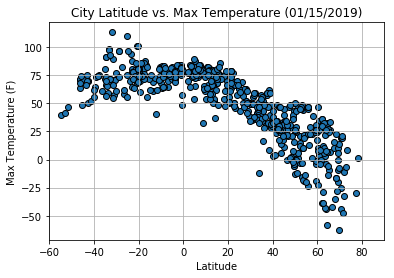

In [6]:
# Build a scatter plot City Latitude vs. Max Temperature

plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)


# Save the figure
plt.savefig("lat_vs_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

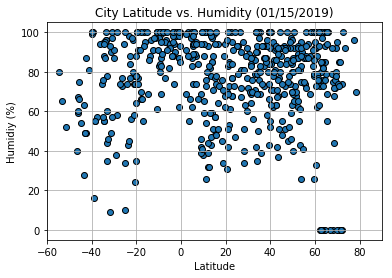

In [7]:
# City Latitude vs Humidity
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

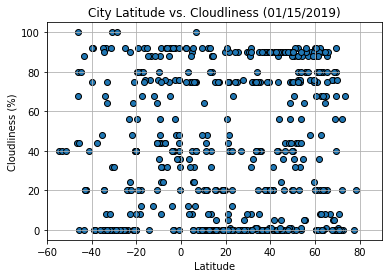

In [8]:
# City Latitude vs Cloudliness
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudliness"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Cloudliness {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Cloudliness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
         
# Save the figure
plt.savefig("lat_vs_cloudliness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

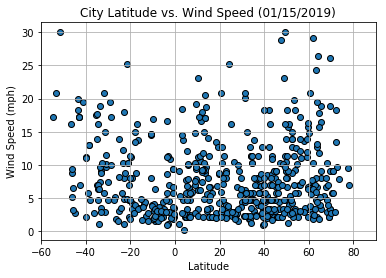

In [9]:
# City Latitude vs Wind Speed
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Wind Speed"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()